In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
from uniflow.flow.client import TransformClient
from uniflow.flow.config import TransformCopyConfig, TransformExpandConfig, ExpandReduceConfig
from uniflow.flow.flow_factory import FlowFactory
from uniflow.viz import Viz

/Users/bytedance/miniconda3/envs/cam/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
FlowFactory.list()

{'extract': ['ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractS3TxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow',
  'TransformExpandFlow',
  'ExpandReduceFlow'],
 'rater': ['RaterFlow']}

In [23]:
# client = TransformClient(TransformCopyConfig())
client = TransformClient(ExpandReduceConfig(split_func="half_split", merge_func="half_merge"))
input = [{"a": 1, "b": 2}, {"c": 3, "d": 4}, {"e": 5, "f": 6}, {"g": 7, "h": 8}]
# input = [{"1": "2", "3": "4", "5": "6", "7": "8"}]
output = client.run(input)

config:  ExpandReduceConfig(flow_name='ExpandReduceFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]), split_func='half_split', merge_func='half_merge')
transform client config:  ExpandReduceConfig(flow_name='ExpandReduceFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]), split_func='half_split', merge_func='half_merge')
transform server config:  TransformConfig(flow_name='ExpandReduceFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]), split_func='half_split', merge_func='half_merge')
server flow_name:  ExpandReduceFlow


100%|██████████| 4/4 [00:00<00:00, 3231.36it/s]


In [24]:
print(client._config)

ExpandReduceConfig(flow_name='ExpandReduceFlow', model_config={}, num_thread=1, prompt_template=PromptTemplate(instruction='', few_shot_prompt=[]), split_func='half_split', merge_func='half_merge')


In [25]:
output

[{'output': [{'a b': '1 2'}], 'root': <uniflow.node.Node at 0x111499a20>},
 {'output': [{'c d': '3 4'}], 'root': <uniflow.node.Node at 0x111498a60>},
 {'output': [{'e f': '5 6'}], 'root': <uniflow.node.Node at 0x111499390>},
 {'output': [{'g h': '7 8'}], 'root': <uniflow.node.Node at 0x111499270>}]

In [26]:
graph = Viz.to_digraph(output[0]["root"])

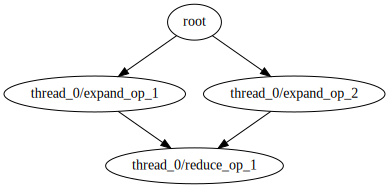

In [27]:
# for mac: brew install graphviz
display(graph)

In [28]:
graph = Viz.to_digraph(output[1]["root"])

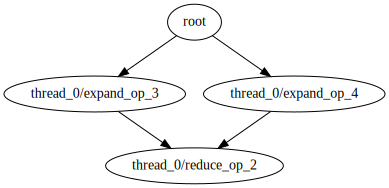

In [29]:
# for mac: brew install graphviz
display(graph)